# Introduction
UMAP, which stands for Uniform Manifold Approximation and Projection, is a dimensionality reduction technique used for visualizing high-dimensional data. Similar to t-SNE, it aims to project high-dimensional data onto a lower-dimensional space (typically 2D or 3D) suitable for visualization, while preserving the underlying structure and relationships between data points.

### Strengths
- Preserves local and global structure: UMAP excels at capturing both local similarities (like t-SNE) and global relationships between data points in the high-dimensional space. This provides a more comprehensive view of the data's structure compared to techniques that focus solely on local neighborhoods.
- Fast and scalable: UMAP is computationally faster than t-SNE, especially for large datasets. This makes it a more viable option for dealing with big data.
- Effective for complex manifolds: UMAP is well-suited for data residing on non-linear manifolds, which are common in real-world datasets. It can effectively represent these complex structures in the lower-dimensional space.

### How UMAP Works (Conceptual Understanding)?
- UMAP constructs a fuzzy topological representation of the high-dimensional data. This essentially captures the connections and relationships between data points in a flexible way.
- In the lower-dimensional space, UMAP optimizes a structure that closely resembles this fuzzy topological representation. This ensures the projected data points maintain their relative positions and relationships as observed in the original high-dimensional space.

### When to Use UMAP
- When there is high-dimensional data with complex, non-linear structures and want to visualize the underlying relationships between data points.
- When dealing with large datasets where computational efficiency is a concern. t-SNE can be slow for big data, while UMAP offers a faster alternative.
- As a general-purpose dimensionality reduction technique for visualization and exploratory analysis of high-dimensional data.

### Comparison with t-SNE and PCA
- t-SNE: UMAP shares some similarities with t-SNE in its focus on preserving local neighborhoods. However, UMAP additionally considers global relationships, making it more versatile for complex data structures.
- PCA: Unlike PCA, which prioritizes capturing variance, UMAP focuses on preserving the actual relationships between data points. This makes UMAP more suitable for visualization tasks where understanding these relationships is crucial.

# Steps to Apply UMAP
1. Preprocessing: Consider standardizing the data (centering and scaling features) to ensure all features contribute equally to the distance calculations used by UMAP. This can improve the quality of the visualization. Libraries like sklearn.preprocessing.StandardScaler can be used for this purpose.
2. UMAP Model Definition:
    - Import UMAP: Import the UMAP class from a library like `umap`. 
    - Define parameters (Optional): Various parameters for the UMAP model can be defined, such as,
        - `n_neighbors`: The number of nearest neighbors to consider when constructing the fuzzy topological representation. This influences the balance between local and global structure preservation.
        - `n_components`: The desired number of dimensions for the lower-dimensional representation (typically 2 or 3 for visualization).
        - `metric`: The distance metric to use for calculating distances between data points (e.g., "euclidean", "cosine").
3. Model Fitting and Transformation:
    - Model fitting: Create a UMAP object with the desired parameters.
    - Data transformation: Use the fit_transform method on the UMAP object to fit the model to the data and obtain the lower-dimensional representation. This gives the data points projected onto the chosen number of dimensions (e.g., 2D or 3D coordinates).
4. Visualization:
    - Choose Visualization Library: Select a suitable library like `matplotlib` or `seaborn` to create a scatter plot of the transformed data points in the lower-dimensional space.
    - Labeling and Interpretation: Optionally, add labels or color-code the data points based on target variables or other relevant information for easier interpretation of the visualized clusters or structures.

### Additional considerations
- Choosing Parameters: Experimenting with different `n_neighbors` and metric values can influence the visualization outcome. Techniques like grid search can be used to find optimal hyperparameter settings.
- UMAP vs. t-SNE: While UMAP generally offers better computational efficiency, t-SNE might sometimes produce slightly more visually distinct clusters for specific datasets. Consider trying both techniques to see which one yields better results for the particular data.

# Implementation of UMAP

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# configuring the notebook
pd.set_option("display.max_columns", None)
sns.set_theme(style = "whitegrid")
warnings.filterwarnings("ignore")

In [3]:
# importing the data
df = pd.read_csv("data.csv")
df.head()

,f1,f2
0,2.038772,1.102760
1,0.869536,0.238030
2,1.795888,1.020364
3,0.103510,-0.513661
4,1.479554,0.750702


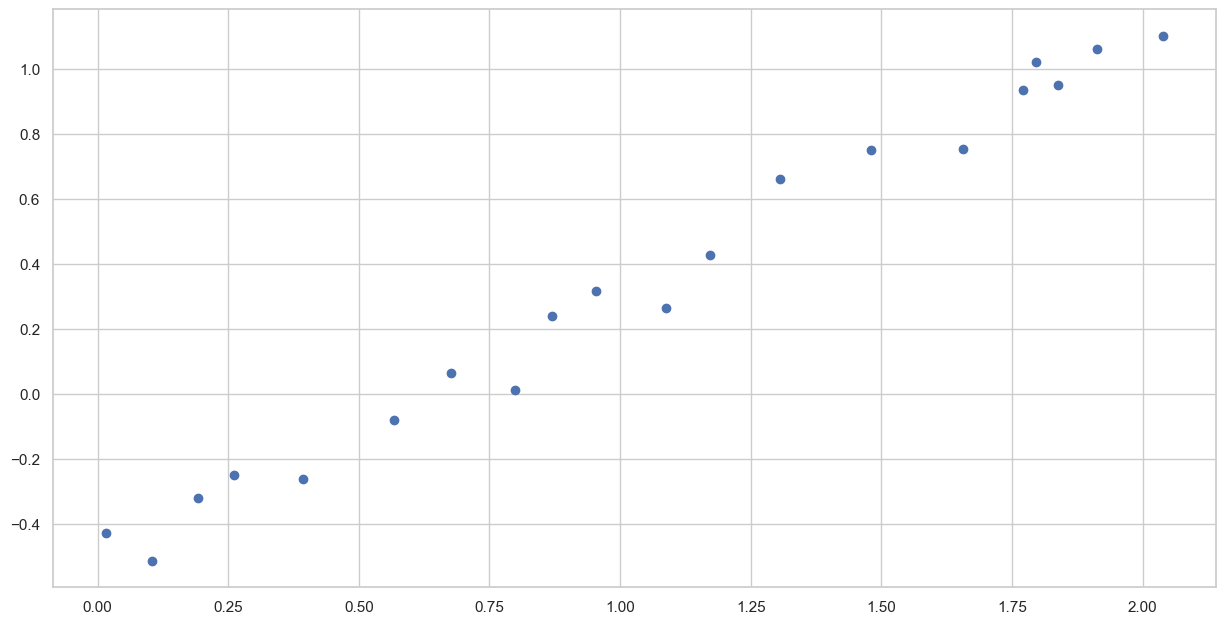

In [4]:
# visualizing the data
plt.figure(figsize = (15, 7.5))
plt.scatter(df["f1"], df["f2"])
plt.show()

In [5]:
# data standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[ 1.54535131,  1.45245914],
       [-0.27203872, -0.18355391],
       [ 1.16782713,  1.29657192],
       [-1.46270299, -1.60570434],
       [ 0.6761373 ,  0.78638828],
       [ 1.34947087,  1.37420876],
       [-1.32351276, -1.24217262],
       [ 1.12913003,  1.13352252],
       [ 0.95000678,  0.7936775 ],
       [-0.57106382, -0.51601814],
       [ 0.06851605, -0.13256012],
       [ 0.19697379,  0.17359728],
       [ 0.40492253,  0.61580503],
       [-0.74142803, -0.78689518],
       [-0.14160441, -0.03396865],
       [-1.01204978, -1.12815545],
       [-1.59801963, -1.44282205],
       [ 1.23234064,  1.16652774],
       [-1.21750246, -1.10850974],
       [-0.38075383, -0.61239797]])

In [6]:
# model fitting and data transformation
from umap import UMAP

model = UMAP(n_neighbors = 10, n_components = 2, metric = "euclidean")
df_transformed = model.fit_transform(df)
df_transformed

array([[ 1.8817722 , -3.6823132 ],
       [ 5.1052113 , -1.4628642 ],
       [ 1.8300644 , -3.2573683 ],
       [ 6.109404  ,  0.8673919 ],
       [ 3.0926762 , -2.5550547 ],
       [ 2.1844964 , -3.9446902 ],
       [ 6.3355865 ,  0.38355595],
       [ 2.3484166 , -3.111057  ],
       [ 3.1039069 , -3.104075  ],
       [ 5.0217543 , -0.6934744 ],
       [ 4.569868  , -1.5391392 ],
       [ 4.272444  , -2.0415444 ],
       [ 3.799838  , -2.312218  ],
       [ 5.4735885 , -0.39349613],
       [ 4.8438997 , -1.8588988 ],
       [ 5.9479985 ,  0.12443385],
       [ 6.5473127 ,  0.70309985],
       [ 2.5421453 , -3.5446644 ],
       [ 6.4166884 , -0.11835512],
       [ 5.4014363 , -1.0441451 ]], dtype=float32)

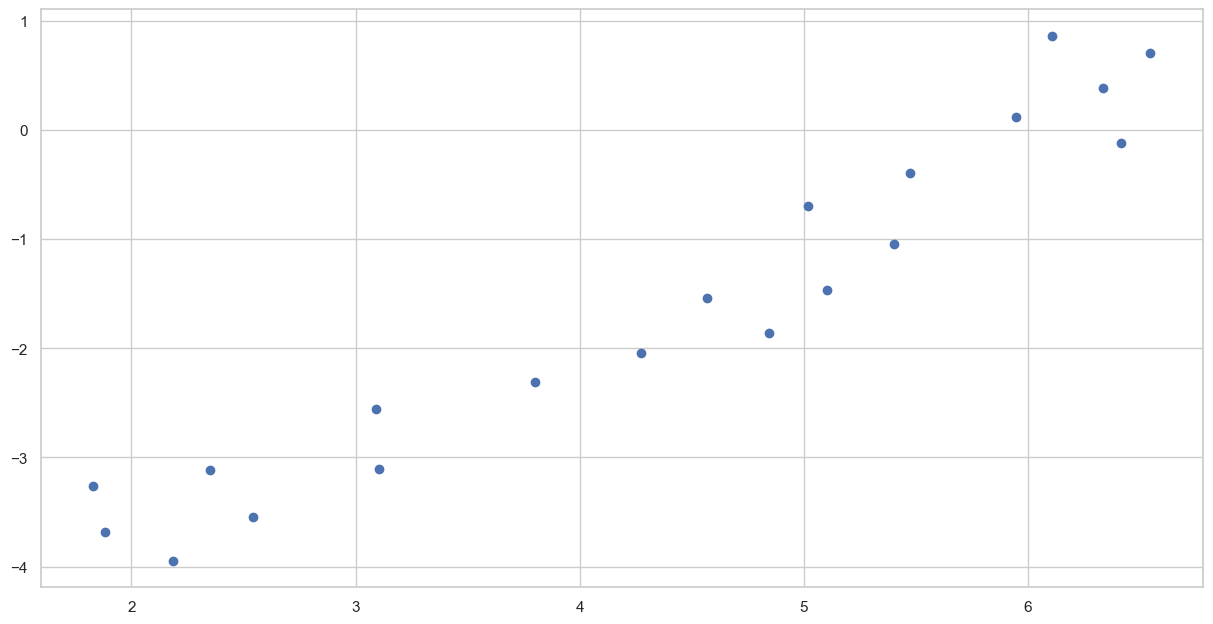

In [7]:
# visualize
plt.figure(figsize = (15, 7.5))
plt.scatter(df_transformed[:, 0], df_transformed[:, 1])
plt.show()

# Interpreting the Results from UMAP
Interpreting the results from UMAP involves understanding the visualized data points in the lower-dimensional space (usually 2D or 3D) and relating them back to the original high-dimensional data.

### Visual patterns and clusters
- Look for clusters or groupings of data points in the UMAP visualization. These clusters might indicate underlying structures or similarities within the data.
- Pay attention to the relative positions of data points. Points closer together in the UMAP space are likely more similar based on how UMAP preserves both local and global relationships.

### Relating UMAP to original data
- Similar to t-SNE, avoid over-interpreting the exact distances or positions of data points in the UMAP plot. These don't necessarily correspond to actual distances in the original high-dimensional space.
- Focus on the relative positioning of data points to identify potential clusters and relationships. Consider using color-coding or labeling the data points based on target variables or other relevant information to see if these groupings align with any meaningful categories in the data.

### Strengths of UMAP visualization
- Compared to t-SNE, UMAP visualizations tend to be more balanced in capturing both local and global structures. This can lead to a more comprehensive understanding of the underlying relationships within the data.
- UMAP often produces smoother and more continuous representations, especially for data residing on complex manifolds.

### Limitations to consider
- UMAP is a stochastic process, meaning repeated runs with the same data might produce slightly different visualizations due to randomness involved in the algorithm.
- Interpreting UMAP results can still be subjective and may require domain knowledge to connect the observed patterns to the real-world meaning of the data.

### Additional tips
- Experiment with different `n_neighbors` values in the UMAP model. This hyperparameter influences the balance between local and global structure preservation, potentially leading to different visualization outcomes.
- Explore using other dimensionality reduction techniques like PCA alongside UMAP. PCA can reveal the directions of greatest variance, which might provide complementary insights into the data structure.